<a href="https://colab.research.google.com/github/NataliaMak20/ML/blob/main/Keras_and_Tensorflow_for_Fashion_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
import tensorflow as tf
from tensorflow import keras

In [89]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
import wandb
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [91]:
batch_size = 128
epochs = 10
wandb.init(project="fashion",
           config={"batch_size": batch_size, "epochs": epochs})

In [92]:
print(tf.__version__)

2.9.2


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
mnist = keras.datasets.fashion_mnist

In [95]:
#Type of the dataset is module 
type(mnist)

module

In [96]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [97]:
#The way the datset is organized
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [98]:
#60000 number of rows
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [99]:
#Total 70000 rows, 10000 used in test and 60000 used in train
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [100]:
#255 is the values of the image
np.max(X_train)

255

In [101]:
np.mean(X_train)

72.94035223214286

In [102]:
#total 10 classes
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [103]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [104]:
X_train.shape

(60000, 28, 28)

In [105]:
X_test.shape

(10000, 28, 28)

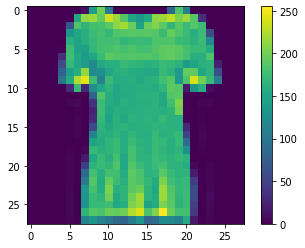

In [106]:
#random one image
plt.figure()
plt.imshow(X_train[10])
plt.colorbar()

In [107]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [108]:
X_train = X_train/255.0

In [109]:
X_test = X_test/255.0

In [110]:
np.max(X_train)

1.0

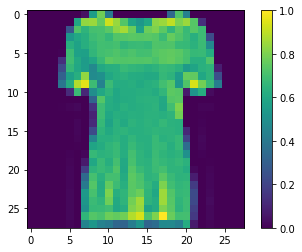

In [111]:
#Color is not changed
plt.figure()
plt.imshow(X_train[10])
plt.colorbar()

In [112]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [113]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [114]:
#all parameters are possible to train
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [115]:
#Model compilation
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [116]:
#training data 10 time
#almost 91% accuracy on the training set
model.fit(X_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4867 - accuracy: 0.8249
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3635 - accuracy: 0.8656
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3276 - accuracy: 0.8781


In [117]:
#87% accuracy on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3599 - accuracy: 0.8672
0.8672000169754028


In [118]:
from sklearn.metrics import accuracy_score

In [119]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


In [120]:
accuracy_score(y_test, y_pred)

0.8672

In [121]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [122]:
pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [123]:
pred

array([[1.1874220e-05, 3.2270609e-07, 8.8137028e-07, ..., 3.0375609e-02,
        2.8956474e-05, 9.2435306e-01],
       [5.4690539e-05, 8.5656469e-09, 9.8070127e-01, ..., 1.8299246e-11,
        1.5381559e-07, 1.9067527e-10],
       [4.4428941e-08, 9.9999994e-01, 3.8587262e-09, ..., 3.7670215e-18,
        1.9779602e-11, 3.1554999e-15],
       ...,
       [3.0627269e-03, 1.6279303e-06, 9.2972332e-04, ..., 4.4820181e-06,
        9.8431259e-01, 1.2729211e-07],
       [3.0263936e-06, 9.9994332e-01, 8.2366347e-07, ..., 9.8518589e-13,
        2.7530014e-08, 2.7484774e-09],
       [1.4273381e-04, 9.5872147e-06, 9.1434275e-05, ..., 5.4768012e-03,
        2.7059964e-04, 1.6652791e-04]], dtype=float32)

In [124]:
#probability 
pred[0]

array([1.1874220e-05, 3.2270609e-07, 8.8137028e-07, 7.4723112e-06,
       6.8515294e-07, 4.5201339e-02, 1.9702393e-05, 3.0375609e-02,
       2.8956474e-05, 9.2435306e-01], dtype=float32)

In [125]:
class_names

['top',
 'trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankle boot']

In [126]:
np.argmax(pred[0])

9

In [127]:
np.argmax(pred[1])

2

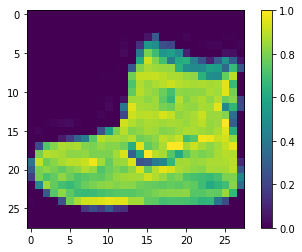

In [128]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

In [129]:
pred = np.argmax(model.predict(X_test[0].reshape(1,-1)))
pred

1/1 [==============================] - 0s 75ms/step


9

In [130]:
class_names[pred]

'ankle boot'

In [131]:
model.save('model')
model.save_weights('model.h5')

In [132]:
model1 = keras.models.load_model('model')
model1.load_weights('model.h5')


In [133]:
import sys
!{sys.executable} -m pip install numpy tensorflow
from IPython.display import clear_output
clear_output()
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [134]:
def create_cnn(input_shape, output_classes):
    return keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(output_classes, activation="softmax"),
        ]
    )

In [135]:
def get_mnist_data():
    (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255

    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)

    num_classes = 10
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    return (x_train, y_train), (x_test, y_test)

In [136]:
batch_size = 128
epochs = 2

In [138]:
x_train, y_train = get_mnist_data()[0]

In [139]:
model = create_cnn((28, 28, 1), 10)

model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs, validation_split=0.1)

Epoch 1/2
422/422 [==============================] - 46s 108ms/step - loss: 0.6197 - accuracy: 0.7817 - val_loss: 0.4340 - val_accuracy: 0.8470
Epoch 2/2
422/422 [==============================] - 46s 110ms/step - loss: 0.3951 - accuracy: 0.8611 - val_loss: 0.3764 - val_accuracy: 0.8677


In [140]:
model.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs, validation_split=0.1,
          callbacks=[wandb.keras.WandbCallback()])
wandb.finish()

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/2
422/422 [==============================] - ETA: 0s - loss: 0.3475 - accuracy: 0.8774

wandb: Adding directory to artifact (/content/wandb/run-20221212_105528-4lje6nvc/files/model-best)... Done. 0.0s


422/422 [==============================] - 49s 115ms/step - loss: 0.3475 - accuracy: 0.8774 - val_loss: 0.3662 - val_accuracy: 0.8688
Epoch 2/2
422/422 [==============================] - ETA: 0s - loss: 0.3216 - accuracy: 0.8860

wandb: Adding directory to artifact (/content/wandb/run-20221212_105528-4lje6nvc/files/model-best)... Done. 0.0s


422/422 [==============================] - 47s 111ms/step - loss: 0.3216 - accuracy: 0.8860 - val_loss: 0.3243 - val_accuracy: 0.8818


accuracy,▁█
epoch,▁█
loss,█▁
val_accuracy,▁█
val_loss,█▁
accuracy,0.886
best_epoch,1
best_val_loss,0.32429
epoch,1
loss,0.32164
val_accuracy,0.88183
